## Preprocessing for data vizualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\maxen\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\maxen\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\maxen\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
   

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
df = pd.read_excel('processed_gamelist.xlsx')
df.head()

,Unnamed: 0,gameId,Name,Price,Rating,hasDLC,inAppPurchases,Release Date,Multiplayer,Action,Adventure,Casual,Early Access,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,0,1903340,Clair Obscur: Expedition 33,67.48,Very Positive,1,0,2025-04-24,0,1,0,0,0,0,0,1,0,0,0,0
1,1,2993780,FANTASY LIFE i: The Girl Who Steals Time,59.99,Very Positive,0,0,2025-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,2,730,Counter-Strike 2,0.00,Very Positive,1,1,2012-08-21,1,1,0,0,0,0,0,0,0,0,0,0
3,3,1091500,Cyberpunk 2077,59.99,Very Positive,1,0,2020-12-09,0,0,0,0,0,0,0,1,0,0,0,0
4,4,2488370,Cash Cleaner Simulator,14.79,Very Positive,1,0,2025-05-08,0,0,0,1,0,1,0,0,0,1,0,0


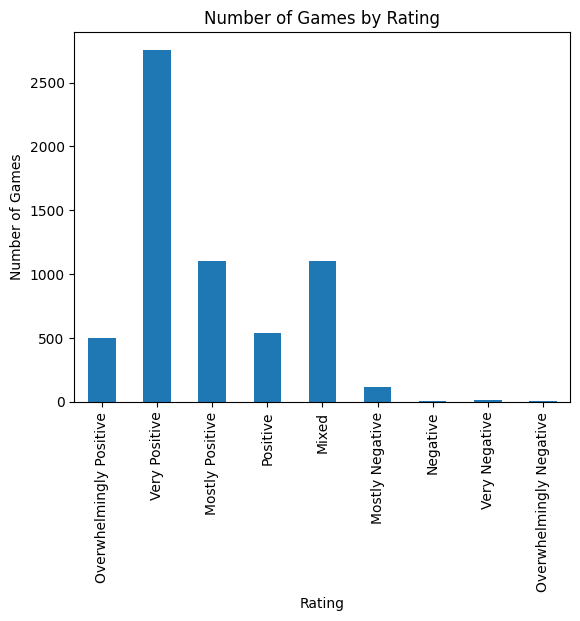

In [ ]:
# Histogram of rating
rating_order = [
    'Overwhelmingly Positive',
    'Very Positive',
    'Mostly Positive',
    'Positive',
    'Mixed',
    'Mostly Negative',
    'Negative',
    'Very Negative',
    'Overwhelmingly Negative',
]
rating_counts = df['Rating'].value_counts().reindex(rating_order, fill_value=0)

rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.title('Number of Games by Rating')
plt.show()


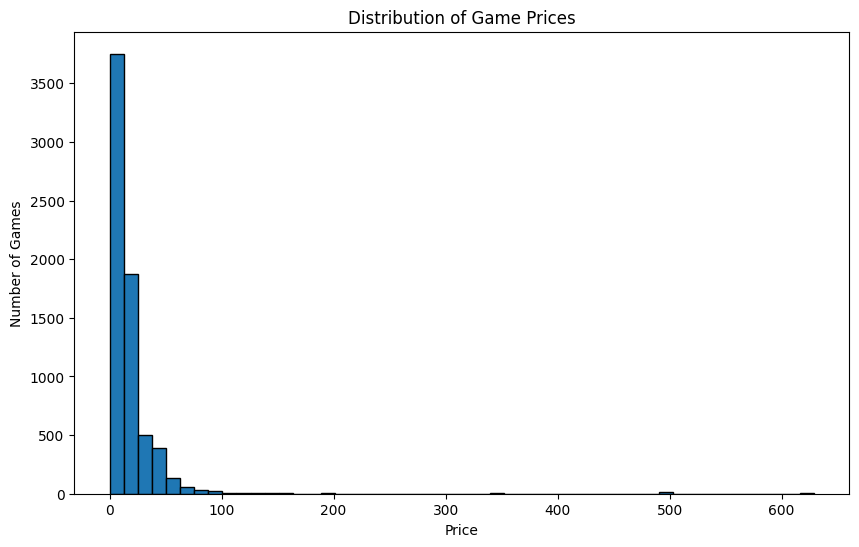

In [ ]:
# Plot the distribution of prices
plt.figure(figsize=(10, 6))
df['Price'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Games')
plt.title('Distribution of Game Prices')
plt.show()


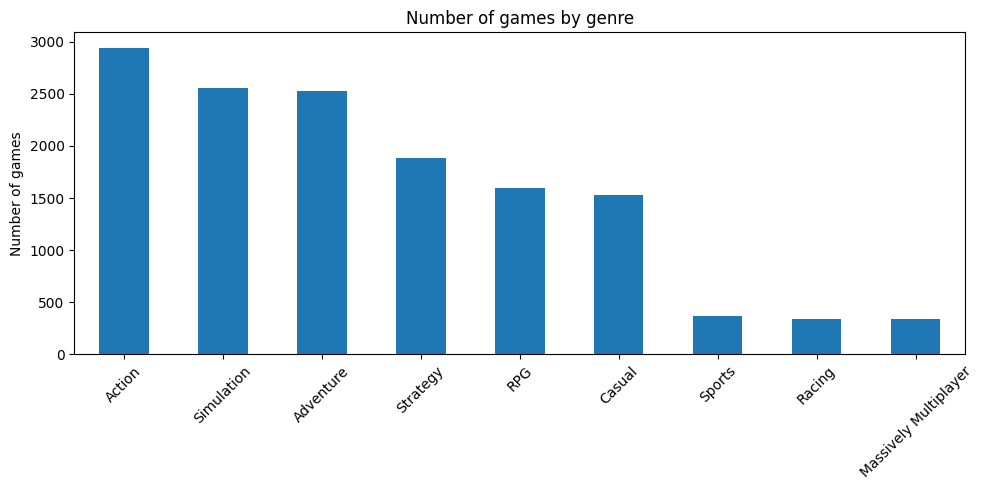

In [ ]:
# Histogram of number of games per genre
genre_columns = ['Action', 'Adventure', 'Casual', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy', 'Massively Multiplayer']
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

genre_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Number of games by genre')
plt.ylabel('Number of games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 

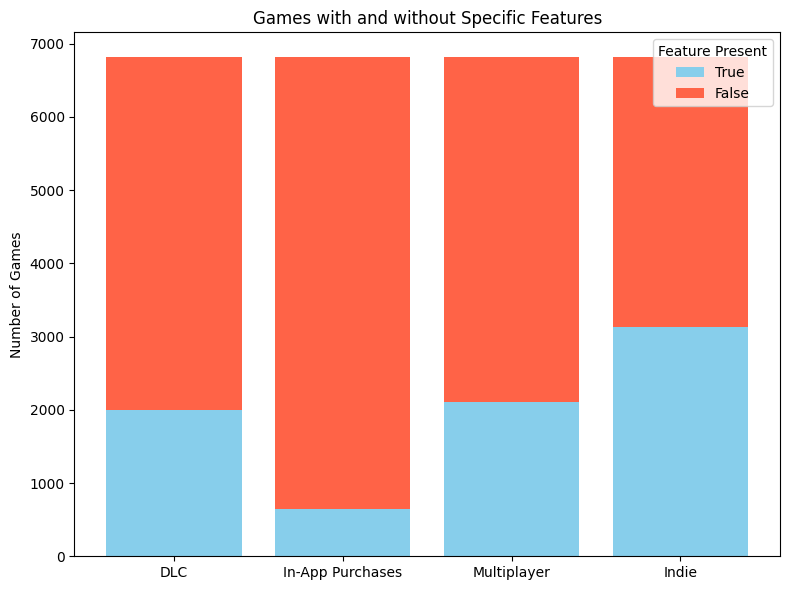

In [ ]:
# Total number of games
total_games = len(df)

# Count of True values
num_dlc = df['hasDLC'].sum()
num_inapp = df['inAppPurchases'].sum()
num_multi = df['Multiplayer'].sum()
num_indie = df['Indie'].sum()

# Count of False values
num_no_dlc = total_games - num_dlc
num_no_inapp = total_games - num_inapp
num_no_multi = total_games - num_multi
num_no_indie = total_games - num_indie

# Data
features = ['DLC', 'In-App Purchases', 'Multiplayer', 'Indie']
true_counts = [num_dlc, num_inapp, num_multi, num_indie]
false_counts = [num_no_dlc, num_no_inapp, num_no_multi, num_no_indie]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(features, true_counts, label='True', color='skyblue')
plt.bar(features, false_counts, bottom=true_counts, label='False', color='tomato')

# Labels and layout
plt.ylabel('Number of Games')
plt.title('Games with and without Specific Features')
plt.legend(title='Feature Present')
plt.tight_layout()
plt.show()

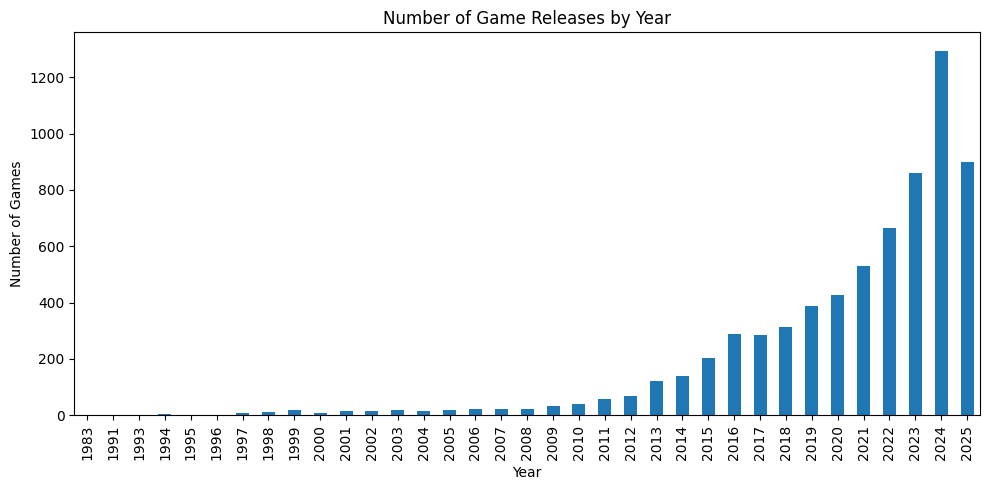

In [ ]:
df['Year'] = df['Release Date'].dt.year
df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='Number of Game Releases by Year')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.tight_layout()
plt.show()